In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("House_Rent_Dataset.csv")

# Data Understanding 

In [3]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [4]:
df.shape

(4746, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


Fitur Point of Contract dan Posted On tidak mempengaruhi harga sewa pada model sehingga akan didrop


In [6]:
df = df.drop(['Posted On', 'Point of Contact'], axis = 'columns')

# Data Preprocessing

## Univariate Analysis

In [7]:
df.groupby('Area Type')['Area Type'].agg('count')


Area Type
Built Area        2
Carpet Area    2298
Super Area     2446
Name: Area Type, dtype: int64

In [8]:
#  Pada Fitur Area Type hanya terdapat 2 sample Built Area sehingga 2 sample tersebut akan dihapus
df.drop(df.index[df['Area Type'] == 'Built Area'], inplace = True)

In [9]:
df.groupby('Area Type')['Area Type'].agg('count')

Area Type
Carpet Area    2298
Super Area     2446
Name: Area Type, dtype: int64

In [10]:
df.groupby('City')['City'].agg('count')


City
Bangalore    886
Chennai      890
Delhi        605
Hyderabad    867
Kolkata      524
Mumbai       972
Name: City, dtype: int64

In [11]:
df.groupby('Furnishing Status')['Furnishing Status'].agg('count')


Furnishing Status
Furnished          679
Semi-Furnished    2251
Unfurnished       1814
Name: Furnishing Status, dtype: int64

In [12]:
df.groupby('Tenant Preferred')['Tenant Preferred'].agg('count')


Tenant Preferred
Bachelors            830
Bachelors/Family    3442
Family               472
Name: Tenant Preferred, dtype: int64

In [13]:
df.groupby('Floor')['Floor'].agg('count')


Floor
1                             2
1 out of 1                  134
1 out of 10                   4
1 out of 11                   1
1 out of 12                   2
                           ... 
Upper Basement out of 4       3
Upper Basement out of 40      1
Upper Basement out of 5       1
Upper Basement out of 7       2
Upper Basement out of 9       2
Name: Floor, Length: 480, dtype: int64

In [14]:
df.groupby('Floor')['Floor'].agg('count')


Floor
1                             2
1 out of 1                  134
1 out of 10                   4
1 out of 11                   1
1 out of 12                   2
                           ... 
Upper Basement out of 4       3
Upper Basement out of 40      1
Upper Basement out of 5       1
Upper Basement out of 7       2
Upper Basement out of 9       2
Name: Floor, Length: 480, dtype: int64

In [15]:
df.groupby('Area Locality')['Area Locality'].agg('count')


Area Locality
 Beeramguda, Ramachandra Puram, NH 9     1
 in Boduppal, NH 2 2                     1
 in Erragadda, NH 9                      1
 in Miyapur, NH 9                        1
117 Residency, Chembur East              1
                                        ..
vanamali chs ghatla, Ghatla              1
venkatapuram                             1
venkatesa perumal nagar                  1
villvam towers tnhb colony               1
whitefield                              12
Name: Area Locality, Length: 2234, dtype: int64

In [16]:
# Fitur Floor dan Area Locality memiliki banyak sekali nilai unique sehingga akan di drop
df = df.drop(['Floor', 'Area Locality'], axis = 'columns')

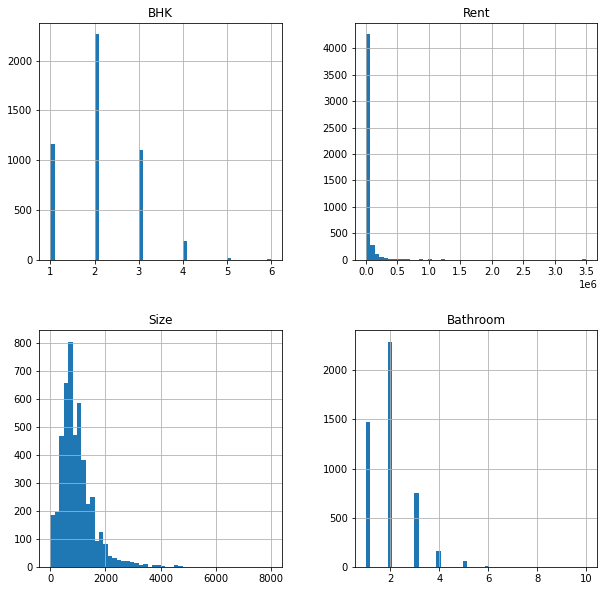

In [17]:
df.hist(bins=50, figsize=(10,10))
plt.ticklabel_format(useOffset=False, style='plain')
plt.show()

In [18]:
df.Rent.describe().apply(lambda x: format(x, 'f'))


count       4744.000000
mean       35003.777403
std        78121.204493
min         1200.000000
25%        10000.000000
50%        16000.000000
75%        33000.000000
max      3500000.000000
Name: Rent, dtype: object

## Multivariate Analysis

In [19]:
# Menambahkan fitur baru price per sqft
df['Price_per_sqft'] = df['Rent']*1000/df['Size']

In [20]:
# Mendeteksi size per BHK outlier
# 100 sqft untuk 1 BHK itu tidak biasa sehingga anggap saja batasan tresholdnya 300 sqft/bhk

df[(df.Size/df.BHK) < 300].head()

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Price_per_sqft
7,1,5000,250,Super Area,Kolkata,Unfurnished,Bachelors,1,20000.000000
12,1,6500,250,Carpet Area,Kolkata,Furnished,Bachelors,1,26000.000000
21,2,9000,400,Carpet Area,Kolkata,Unfurnished,Bachelors,2,22500.000000
32,2,6000,550,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,10909.090909
33,2,5000,500,Carpet Area,Kolkata,Unfurnished,Bachelors/Family,2,10000.000000


In [21]:
# Menghapus size per BHK outlier
df1 = df[~(df.Size/df.BHK < 300)]
df1.head()

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Price_per_sqft
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,9090.909091
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,25000.000000
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,17000.000000
3,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,12500.000000
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,8823.529412


In [22]:
# Mendeteksi price per sqft outlier
df1.Price_per_sqft.describe().apply(lambda x: format(x, 'f'))

count       4196.000000
mean       32827.385605
std        41300.048982
min          571.428571
25%        13000.000000
50%        18511.595708
75%        34896.788991
max      1400000.000000
Name: Price_per_sqft, dtype: object

dapat kita lihat disini bahwasannya Harga 571 per sqft sangat rendah dan harga 1400000 per sqft sangat tinggi

In [23]:
# Menghapus price per sqft outlier dengan mean dan one standard deviation
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('City'):
        m = np.mean(subdf.Price_per_sqft)
        st = np.std(subdf.Price_per_sqft)
        reduced_df = subdf[(subdf.Price_per_sqft>(m-st)) & (subdf.Price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df2 = remove_pps_outliers(df1)
df2.shape

(3699, 9)

In [24]:
# Mendeteksi bathroom outlier
# 2 BHK dengan 4 kamar mandi itu tidak biasa jadi dianggap batasnya kamar mandi tidak boleh melebihi jumlah BHK + 2

df2[df2.Bathroom > df2.BHK + 2]

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Price_per_sqft
860,3,20000,1700,Carpet Area,Chennai,Furnished,Bachelors/Family,6,11764.705882
1904,4,150000,4000,Carpet Area,Delhi,Semi-Furnished,Bachelors,7,37500.000000
3328,1,40000,680,Super Area,Mumbai,Furnished,Bachelors/Family,4,58823.529412


In [25]:
# Menghapus bathroom outlier
df2 = df2[~(df2.Bathroom > df2.BHK + 2)]
df2.head()

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Price_per_sqft
0,3,70000,3354,Carpet Area,Bangalore,Furnished,Bachelors/Family,3,20870.602266
1,2,10500,800,Super Area,Bangalore,Semi-Furnished,Bachelors/Family,2,13125.000000
2,2,13000,1000,Super Area,Bangalore,Semi-Furnished,Bachelors/Family,2,13000.000000
3,2,17000,1040,Super Area,Bangalore,Furnished,Bachelors/Family,2,16346.153846
4,3,21000,1403,Super Area,Bangalore,Semi-Furnished,Bachelors/Family,3,14967.925873


In [26]:
# Menghilangkan fitur price per sqft karena sudah tidak terpakai
df3 = df2.drop(['Price_per_sqft'], axis = 'columns')

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

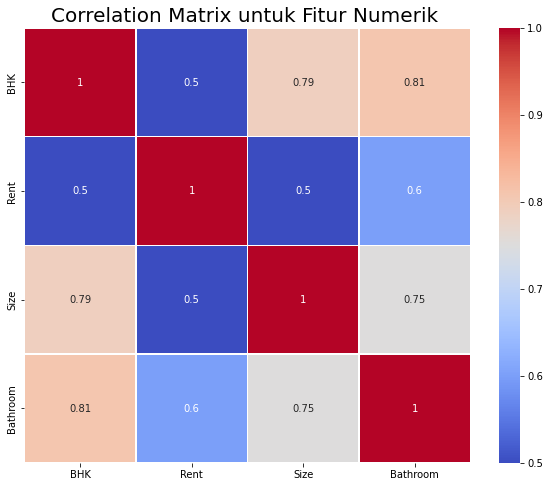

In [27]:
# Melihat kolerasi antara fitur numerik dengan fitur target (harga)
plt.figure(figsize=(10, 8))
correlation_matrix = df3.corr().round(2)
 
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

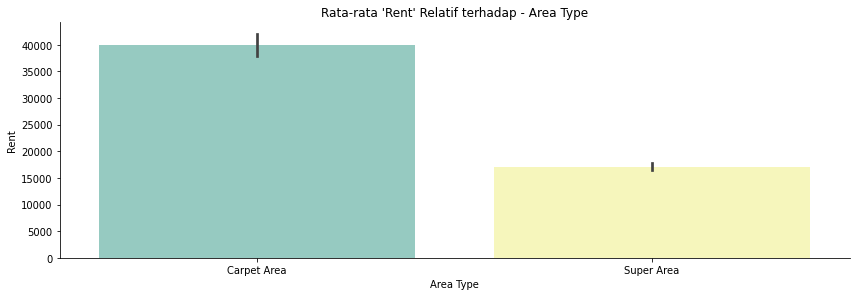

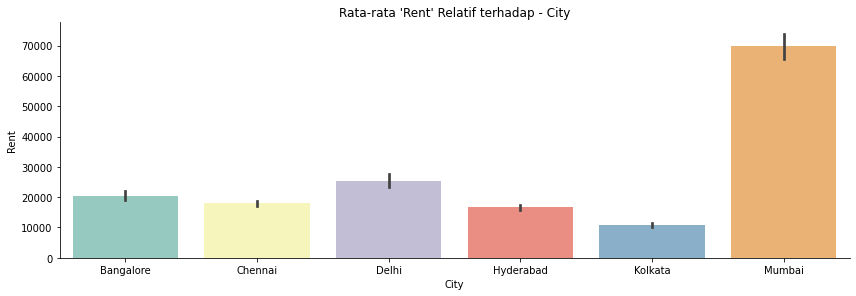

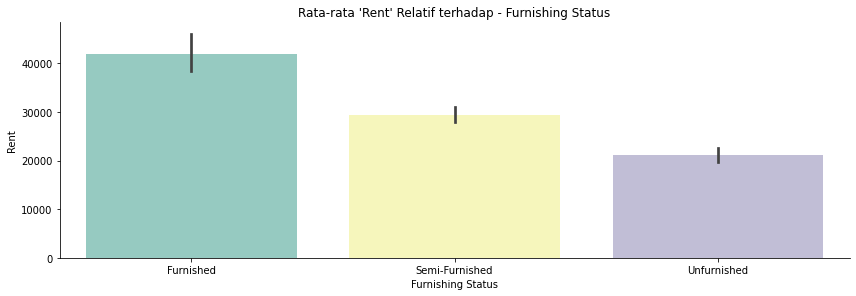

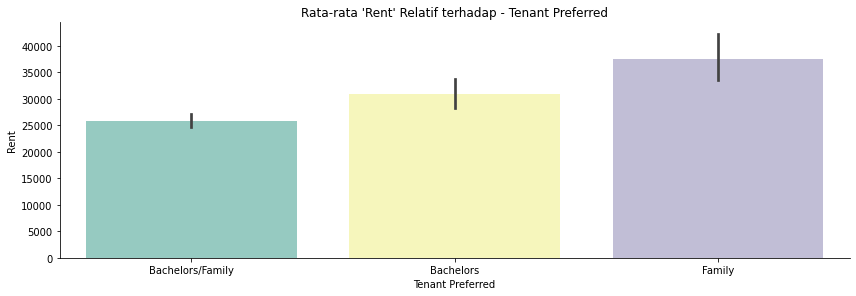

In [28]:
cat_features = df2.select_dtypes(include='object').columns.to_list()
 
for col in cat_features:
  sns.catplot(x=col, y="Rent", kind="bar", dodge=False, height = 4, aspect = 3,  data=df2, palette="Set3")
  plt.title("Rata-rata 'Rent' Relatif terhadap - {}".format(col))

# Data Preparation


## Feature Engineering

In [29]:
df3 = pd.get_dummies(data =  df3, columns = ['Area Type'])
df3 = pd.get_dummies(data =  df3, columns = ['City'])
df3 = pd.get_dummies(data =  df3, columns = ['Furnishing Status'])
df3 = pd.get_dummies(data =  df3, columns = ['Tenant Preferred'])

In [30]:
df3.head()

,BHK,Rent,Size,Bathroom,Area Type_Carpet Area,Area Type_Super Area,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family
0,3,70000,3354,3,1,0,1,0,0,0,0,0,1,0,0,0,1,0
1,2,10500,800,2,0,1,1,0,0,0,0,0,0,1,0,0,1,0
2,2,13000,1000,2,0,1,1,0,0,0,0,0,0,1,0,0,1,0
3,2,17000,1040,2,0,1,1,0,0,0,0,0,1,0,0,0,1,0
4,3,21000,1403,3,0,1,1,0,0,0,0,0,0,1,0,0,1,0


In [31]:
X = df3.drop(["Rent"],axis =1)
y = df3["Rent"]

In [32]:
from sklearn.model_selection import train_test_split
 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state=123)

In [33]:
from sklearn.preprocessing import StandardScaler

# Normalisasi data train
numerical_features = ['BHK', 'Size', 'Bathroom']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,BHK,Size,Bathroom
1865,1.186385,0.454836,0.053982
439,-0.071283,-0.376100,0.053982
823,-0.071283,1.470424,0.053982
3463,-0.071283,-0.560752,0.053982
1519,-0.071283,0.194476,0.053982


In [34]:
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

## Modelling

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error


In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

In [37]:
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['RandomForest', 'Boosting','SVM'])

In [38]:
# buat model prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)
 
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

In [39]:
boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)                             
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

In [40]:
svm = SVR()                           
svm.fit(X_train, y_train)
models.loc['train_mse','svm'] = mean_squared_error(y_pred=svm.predict(X_train), y_true=y_train)

In [41]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['RF','Boosting','svm'])
 
# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = { 'RF': RF, 'Boosting': boosting,'svm':svm}
 
# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))
 # Panggil mse
mse

,train,test
RF,34694984.664362,189690332.370555
Boosting,189673493.550402,296705630.45973
svm,1256652466.449838,2688190525.953401


## Visualiasi chart bar Hasil penghitungan Mean Squared Error masing-masing algoritma

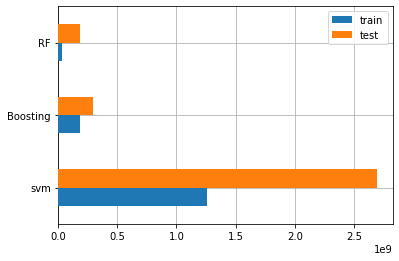

In [42]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

## Hasil Prediksi

In [43]:
prediksi = X_test.iloc[5:10].copy()
pred_dict = {'y_true':y_test[5:10]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_RF,prediksi_Boosting,prediksi_svm
1733,11000,11727.2,14315.0,15766.4
1442,13000,13010.9,14315.0,16029.9
1911,18000,22988.0,14362.6,16082.4
2003,22000,18106.8,15339.0,16235.2
553,11000,11654.4,14315.0,15894.3
